# Ejemplo de Nodos Paralelos

In [1]:
import pandas as pd
import numpy as np
from wrangler import Wrangler
from wrangler.data import PandasDataset, CSVDataset
import wrangler.transformers as tr
import wrangler.transformers.text as text_tr
import wrangler.transformers.ml as ml_tr
from wrangler import logger as wrangler_logger

In [2]:
# Uncomment for console logging 
wrangler_logger.enable()

# Uncomment for file output logging
# wlogger.enable_file(filename='logfile.log')

## Wrangler

In [3]:
# Creamos el Wrangler
wrangler = Wrangler()

# Definimos Datasets
df_b = pd.DataFrame({"letras_b":["d", "e", "f", "g"],
                    'tipo_b':['consonante','vocal','consonante','consonante'],
                     "numeros_b":[3, 4, 5, 6]})



dataset1 = CSVDataset(name='dataset1', filename='../data/dataset1.csv')
dataset2 = PandasDataset(name='dataset2', data=df_b)

# Agregamos Datasets al Wrangler
wrangler.add_dataset(dataset1)

wrangler.add_dataset(dataset2)

wrangler.add_node(
    transformer=tr.ColumnDropper(columns=['nombres']),
    inputs = 'dataset1', 
    outputs= 'dataset3',
    # Si no especificamos un output Wrangler 
    # asigna un dataset intermedio automaticamente
)

wrangler.add_node(
    name='drop de numeros_b',
    transformer=tr.ColumnDropper(columns=['numeros_b']),
    inputs = 'dataset2', 
    outputs= 'dataset4',
    # Si no especificamos un output Wrangler 
    # asigna un dataset intermedio automaticamente
)

wrangler.add_node(
    name= 'nodo join',
    transformer = tr.JoinTransformer(left_on='letras_a', right_on='letras_b', how='outer'),
    inputs = ['dataset3','dataset4'],
    outputs='dataset5'    
)

wrangler.add_node(
    transformer=text_tr.ModeImputer(column='tipo_a'),
    inputs='dataset5',
    outputs='dataset6'
)

wrangler.add_node(
    transformer=tr.DataCheckPoint('../data/checkpoint.csv'),  
    inputs='dataset6',
    outputs='dataset6'
)

def duplicate_dataframe(df):
    return df, df

wrangler.add_node(
    transformer=tr.DataframeTransformer(duplicate_dataframe),  
    inputs='dataset6',
    outputs=['dataset7','dataset8']
)

def do_none(df):
    return df


wrangler.add_node(
    transformer=tr.DataframeTransformer(do_none),  
    inputs='dataset7',
    outputs='dataset7_final'
)

wrangler.add_node(
    transformer=tr.DataframeTransformer(do_none),  
    inputs='dataset8',
    outputs='dataset8_final'
)


2022-02-08 at 10:55:41 | INFO | catalog | Adding dataset: intermediate
2022-02-08 at 10:55:41 | INFO | catalog | Adding dataset: dataset1
2022-02-08 at 10:55:41 | INFO | catalog | Adding dataset: dataset2
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_0 added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node drop de numeros_b added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node nodo join added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_3 added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_4 added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_5 added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_6 added to Pipeline 
2022-02-08 at 10:55:41 | INFO | pipeline | Node node_7 added to Pipeline 


In [4]:
# Fiteamos los nodos
wrangler.fit_transform()

2022-02-08 at 10:55:42 | INFO | node | Running Node: node_0
2022-02-08 at 10:55:42 | INFO | catalog | Loading dataset: dataset1
2022-02-08 at 10:55:42 | DEBUG | base | Loading CSVDataset(name='dataset1', filename='../data/dataset1.csv')
2022-02-08 at 10:55:42 | DEBUG | base | Fitting ColumnDropper(columns=['nombres'])
2022-02-08 at 10:55:42 | DEBUG | base | Transforming ColumnDropper(columns=['nombres'])
2022-02-08 at 10:55:42 | INFO | catalog | Saving dataset: dataset3
2022-02-08 at 10:55:42 | INFO | catalog | Adding dataset: dataset3
2022-02-08 at 10:55:42 | INFO | node | Running Node: drop de numeros_b
2022-02-08 at 10:55:42 | INFO | catalog | Loading dataset: dataset2
2022-02-08 at 10:55:42 | DEBUG | base | Loading PandasDataset(name='dataset2', data=DataFrame)
2022-02-08 at 10:55:42 | DEBUG | base | Fitting ColumnDropper(columns=['numeros_b'])
2022-02-08 at 10:55:42 | DEBUG | base | Transforming ColumnDropper(columns=['numeros_b'])
2022-02-08 at 10:55:42 | INFO | catalog | Saving 

In [6]:
# Leemos el dataset resultante
wrangler.data_catalog.load('dataset8_final')

2022-02-08 at 10:56:01 | INFO | catalog | Loading dataset: dataset8_final
2022-02-08 at 10:56:01 | DEBUG | base | Loading PandasDataset(name='dataset8_final', data=DataFrame)


,numeros_a,numeros_c,letras_a,tipo_a,letras_b,tipo_b
0,1,11,a,vocal,NaN,NaN
1,2,12,b,consonante,NaN,NaN
2,3,13,c,consonante,NaN,NaN
3,4,14,d,consonante,d,consonante
4,5,15,e,vocal,e,vocal
5,6,16,f,consonante,f,consonante
6,7,17,g,consonante,g,consonante
7,8,18,h,consonante,NaN,NaN
8,9,19,i,vocal,NaN,NaN
9,10,20,j,consonante,NaN,NaN


In [7]:
# Guardamos el Wrangler fiteado
# Solo se guardaran los datasets que no esten en memoria
wrangler.save('../data/parallel_example_wrangler')

In [8]:
# Creamos un nuevo Wrangler vacio
new_wrangler = Wrangler()

2022-02-08 at 10:56:08 | INFO | catalog | Adding dataset: intermediate


In [9]:
new_wrangler.load('../data/parallel_example_wrangler')

In [10]:
new_wrangler.data_catalog.datasets

{'dataset1': CSVDataset(name='dataset1', filename='../data/dataset1.csv')}

In [11]:
# El Wrangler necesita dataset1 y dataset2 para ejecutar
new_wrangler.pipeline.inputs()

{'dataset1', 'dataset2'}

In [12]:
df_a_test = pd.DataFrame({
    "letras_a":["h", "i", "j", "j", "l", "m",'n'],
    'tipo_a':['consonante','vocal','consonante','consonante','consonante','consonante',np.NaN],
    "numeros_a":[1, 2, 3, 4, 5, 6, np.NaN]
                     })


df_b_test = pd.DataFrame({
    "letras_b":["o", "p", "q", "r"],
    'tipo_b':['vocal','consonante','consonante','consonante'],
    "numeros_b":[3, 4, 5, 6]
                     })

dataset_test1 = PandasDataset('dataset1',df_a_test)
dataset_test2 = PandasDataset('dataset2',df_b_test)

# Agregamos/Sobreescribimos los nuevos dataset1 y dataset2
new_wrangler.add_dataset(dataset_test1,)
new_wrangler.add_dataset(dataset_test2,)

2022-02-08 at 10:56:11 | INFO | catalog | Adding dataset: dataset1
2022-02-08 at 10:56:11 | INFO | catalog | Adding dataset: dataset2


In [13]:
# Aplicamos las transformaciones predefinidas 
new_wrangler.transform()

2022-02-08 at 10:56:11 | INFO | node | Running Node: node_0
2022-02-08 at 10:56:11 | INFO | catalog | Loading dataset: dataset1
2022-02-08 at 10:56:11 | DEBUG | base | Loading PandasDataset(name='dataset1', data=DataFrame)
2022-02-08 at 10:56:11 | DEBUG | base | Transforming ColumnDropper(columns=['nombres'])
2022-02-08 at 10:56:11 | INFO | catalog | Saving dataset: dataset3
2022-02-08 at 10:56:11 | INFO | catalog | Adding dataset: dataset3
2022-02-08 at 10:56:11 | INFO | node | Running Node: drop de numeros_b
2022-02-08 at 10:56:11 | INFO | catalog | Loading dataset: dataset2
2022-02-08 at 10:56:11 | DEBUG | base | Loading PandasDataset(name='dataset2', data=DataFrame)
2022-02-08 at 10:56:11 | DEBUG | base | Transforming ColumnDropper(columns=['numeros_b'])
2022-02-08 at 10:56:11 | INFO | catalog | Saving dataset: dataset4
2022-02-08 at 10:56:11 | INFO | catalog | Adding dataset: dataset4
2022-02-08 at 10:56:11 | INFO | node | Running Node: nodo join
2022-02-08 at 10:56:11 | INFO | ca

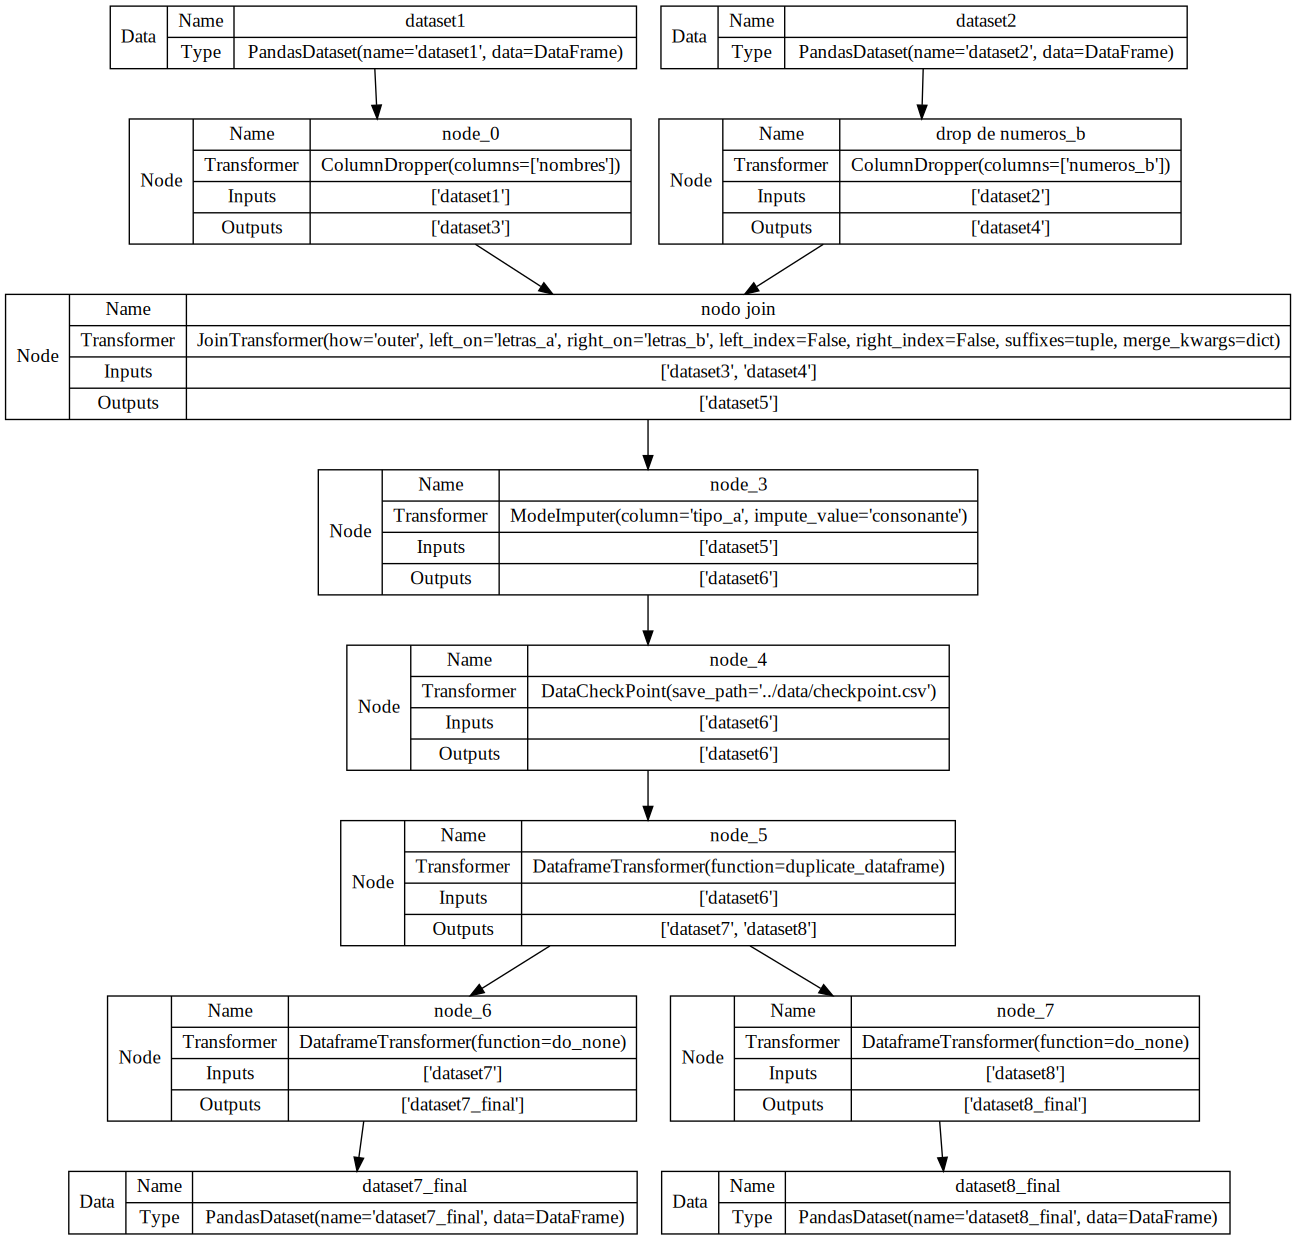

In [14]:
from wrangler.extras import plot_wrangler

plot_wrangler(new_wrangler)